In [189]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

# set size for plots
plt.rcParams['figure.figsize'] = (14.0, 8.0)

notes
initial temp = room
x, y - spatial dimension
t - time
T - Kalwins as unit (as i want)
K - therma conductivity
cw - specific heat
Heater contact = 100 C

condition type 2
derivate in insolted part is 0

The whole plate should have the same temp. Sould higher than initial. 

Results
Verify simulation with theory for every metal. Compare them.

Size of plat 10x10
heater 2x2
h = 0.005 m
boundary condition 1
T1 = 100
T2 = 10
boundry condition 2
P = 100
th = 10
B = edge is isolated - boundary particle value is the same as pre-boundary

Don't consider boundar particles in equation, they are formulated in boundary condition

Only first boundary condition
Steady state of three matels, compare them
Numerical stability
Demonstrate temparature distribution

In [194]:
# intput data
A = 0.1
B = 0.02
h = 0.005

#N =  number of paritcles
nx = ny = 5
dx = A/nx
dy = A/ny

#time grid
t_sim = 100                #s TIME 
dt =  1e-3                 #s Time step
nt  = int(t_sim/dt)       #Number of time step

# aluminia
K = 237 
cw = 900
p = 2700
# 1 boundary condition
T1 = 100
T2 = 10

In [195]:
# first boundary condition
T = np.ones((nx, ny)) * T2
up_shift = int(0.5*nx - 0.5*B/dx)
down_shift = int(0.5*ny + 0.5*B/dx)
print((down_shift - up_shift) * dx)
T[up_shift:down_shift,up_shift:down_shift] = 100

0.02


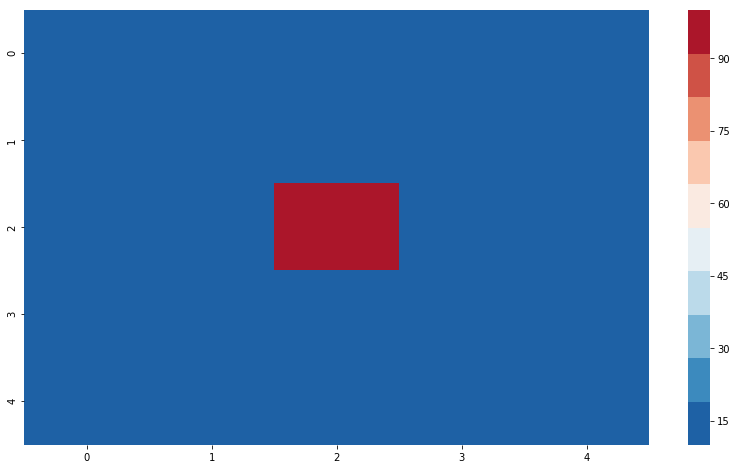

In [196]:
sns.heatmap(T, cmap=sns.color_palette("RdBu_r", 10))

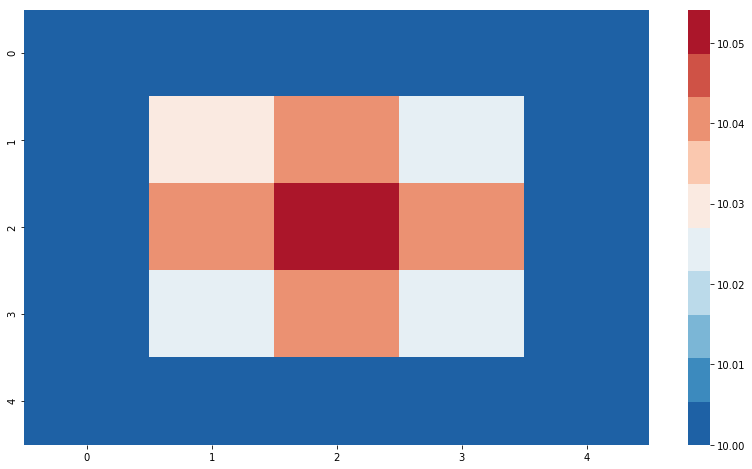

In [201]:
for n in range(10000):
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_pref = T[i,j]
            dT1_num = T[i+1, j] - 2 * T[i, j] + T[i-1, j]
            dT2_num = T[i, j+1] - 2 * T[i, j] + T[i, j-1]
            const = (K * dt)/(cw * p)
            T[i,j] = T_pref + const / (dx**2) * dT1_num + const / (dy**2) *dT2_num
"""    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(10, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
surf = ax.plot_surface(X, Y, T, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=0, vmax=100)
plt.show()
"""
sns.heatmap(T, cmap=sns.color_palette("RdBu_r", 10))

In [200]:
print(T)

[[10.         10.         10.         10.         10.        ]
 [10.         10.47111027 10.66677973 10.47096889 10.        ]
 [10.         10.66677973 10.94371732 10.6665792  10.        ]
 [10.         10.47096889 10.6665792  10.47082755 10.        ]
 [10.         10.         10.         10.         10.        ]]
